# Exercise 3: Solving Nonlinear Problems
![image.png](attachment:image.png)

In this exercise, we will solve the following nonlinear PDE:

\begin{alignat}{2}
-\nabla\cdot(a(u)\nabla u) &= f(u) \quad && \text{ in } \Omega \\
u &= u_{\mathrm{L}} \quad && \text{ on } \Gamma_{\mathrm{L}} \\
u &= u_{\mathrm{R}} \quad && \text{ on } \Gamma_{\mathrm{R}} \\
-a(u)\partial_n u &= g \quad && \text{ on } \Gamma_{\mathrm{N}}
\end{alignat}

We will use the following data:

* $\Omega = (0,1)^3$ (the unit cube)
* $a(u) = 1 + u^2$
* $f(u) = u^3$
* $\Gamma_{\mathrm{L}} = \{(x,y,z) \in \partial\Omega \mid x = 0\}$ (the left boundary)
* $\Gamma_{\mathrm{R}} = \{(x,y,z) \in \partial\Omega \mid x = 1\}$ (the right boundary)
* $\Gamma_{\mathrm{N}} = \partial\Omega \setminus (\Gamma_{\mathrm{L}} \cup \Gamma_{\mathrm{R}})$
* $u_{\mathrm{L}} = \sin(2\pi yz)$
* $u_{\mathrm{R}} = \sin(2\pi (1-yz))$
* $g = 0$

For hints and more reading on how to solve this problem in FEniCS, see the [section on the nonlinear Poisson problem](https://fenicsproject.org/pub/tutorial/html/._ftut1007.html#ftut1:gallery:nonlinearpoisson) in the [FEniCS Tutorial](https://fenicsproject.org/tutorial/).

## Importing FEniCS
The first thing we need to do is to import FEniCS.

In [1]:
from fenics import *

## Initializing notebook plotting

When running in a Jupyter notebook, a special line is necessary to show FEniCS plots in the notebook.

In [2]:
%matplotlib inline

## Creating the mesh
Create the mesh by using the built-in class `UnitCubeMesh`. A mesh size of $h=1/24$ is reasonable for this exercise.

In [3]:
mesh = UnitCubeMesh(24,24,24)
mesh

## Defining the finite element function space
When we have created the mesh, we can define the finite element function space. We will use a standard piecewise linear $P_1$ function space.

In [4]:
V = FunctionSpace(mesh, 'P', 1)

Calling FFC just-in-time (JIT) compiler, this may take some time.


## Defining the boundary condition
The boundary conditions can be defined by specifying all points on the boundary close to the left and right boundaries. Use an `Expression` to define $u_\mathrm{L}$ and $u_\mathrm{R}$, and the `DirichletBC` class to define the two boundary conditions. Collect both boundary conditions in a variable named `bcs`.

In [7]:
def leftBC(x, on_boundary):
    return on_boundary and near(x[0],0)
def rightBC(x, on_boundary):
    return on_boundary and near(x[0],1)
u_L = Expression('sin(2*pi*x[1]*x[2])',degree=2)
bc_L = DirichletBC(V, u_L, leftBC)
u_R = Expression('sin(2*pi*(1 - x[1]*x[2]))',degree=2)
bc_R = DirichletBC(V, u_R, leftBC)
bcs = [bc_L, bc_R]

## Defining the variational problem
The finite element variational problem for the nonlinear PDE reads: Find $u \in V$ such that
$$
\int_{\Omega} (1 + u^2) \, \nabla u \cdot \nabla v \,\mathrm{d}x
= \int_{\Omega} u^3 \, v \,\mathrm{d}x
$$
for all $v \in V$.

This can be expressed in FEniCS by defining the nonlinear form $F$:

\begin{align}
  F(u; v) = \int_{\Omega} (1 + u^2) \, \nabla u \cdot \nabla v \,\mathrm{d}x 
  - \int_{\Omega} u^3 \, v \,\mathrm{d}x
\end{align}
and solving $F(u; v) = 0$ for all $v \in V$.

(Note that $F$ is technically a *linear* form in FEniCS since it is linear in the test function $v$ and is assembled into a vector, in contrast to a *bilinear* form which is linear in both $u$ and $v$ and assembled into a matrix.)

In [9]:
u = Function(V)
v = TestFunction(V)
F = (1+u**2)*dot(grad(u),grad(v))*dx - u**3*v*dx

## Solving the variational problem
The variational problem can now be solved by calling the FEniCS `solve` command. Use the `plot` command to visualize the solution. 

array([-2.44929360e-16, -2.44929360e-16, -3.99698601e-01, ...,
       -4.52588235e-01, -3.26968011e-01, -2.44929360e-16])

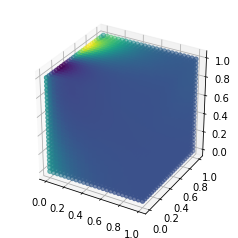

In [13]:
solve(F==0,u, bcs)
plot(u)
u.vector()[:]

## Postprocessing
To postprocess the solution using an external postprocessor, for example Paraview, save the solution to VTK format (file suffix `.pvd`).